In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [2]:
ruta_archivo = "/content/activity_2_ml.csv"

In [4]:
data = pd.read_csv(ruta_archivo)

In [5]:
print(data)

     YEAR  AGE  DISTANCE_BUS  DISTANCE_INTERSTATE     PRICE  ROOMS  AREA  \
0    1978    1       30000.0              30000.0   75900.0      7  1836   
1    1981    7       22000.0              22000.0  140000.0      6  1800   
2    1981   31        3000.0               2000.0   68000.0      6  3304   
3      81    2       15000.0              17000.0       NaN      7  2744   
4    1981    0       10000.0              13000.0  216000.0      7  2548   
..    ...  ...           ...                  ...       ...    ...   ...   
348  1981   51        2000.0               5000.0   50000.0      5  1140   
349    81    1       22000.0              24000.0  162000.0      7  2656   
350    78    3       12000.0              12000.0   64900.0      7  2856   
351  1978   26       20000.0              22000.0   58000.0      6  1356   
352  1978    0       24000.0              25000.0       NaN      7  2464   

         LAND  BATHS  
0     45738.0      2  
1     44867.0      3  
2     18731.0     

In [6]:
wage = data[['YEAR', 'AGE', 'DISTANCE_BUS', 'DISTANCE_INTERSTATE', 'PRICE', 'ROOMS','AREA','LAND','BATHS']]

In [7]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 353 non-null    int64  
 1   AGE                  353 non-null    int64  
 2   DISTANCE_BUS         353 non-null    float64
 3   DISTANCE_INTERSTATE  353 non-null    float64
 4   PRICE                283 non-null    float64
 5   ROOMS                353 non-null    int64  
 6   AREA                 353 non-null    int64  
 7   LAND                 353 non-null    float64
 8   BATHS                353 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 24.9 KB


In [10]:
wage

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2
3,81,2,15000.0,17000.0,NaN,7,2744,77101.0,3
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3
...,...,...,...,...,...,...,...,...,...
348,1981,51,2000.0,5000.0,50000.0,5,1140,13945.0,1
349,81,1,22000.0,24000.0,162000.0,7,2656,45302.0,3
350,78,3,12000.0,12000.0,64900.0,7,2856,29955.0,2
351,1978,26,20000.0,22000.0,58000.0,6,1356,544500.0,2


AEN AGE PONE 0 Y PUES NO SE PODRIA TOMAR QUE TIENE 0 AÑOS

In [11]:
wage['YEAR'].unique()

array([1978, 1981,   81,   78])

In [15]:
wage['YEAR'] = wage['YEAR'].astype(str)

In [16]:
wage['YEAR'] = wage['YEAR'].apply(lambda x: '19' + x if len(x) == 2 else x)

In [17]:
wage['YEAR'].unique()

array(['1978', '1981'], dtype=object)

In [18]:
wage.duplicated().sum()

21

In [19]:

wage.drop_duplicates(inplace=True)
wage.reset_index(drop=True, inplace=True)

In [20]:
wage.duplicated().sum()

0

In [21]:
wage

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2
3,1981,2,15000.0,17000.0,NaN,7,2744,77101.0,3
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3
...,...,...,...,...,...,...,...,...,...
327,1981,51,2000.0,5000.0,50000.0,5,1140,13945.0,1
328,1981,1,22000.0,24000.0,162000.0,7,2656,45302.0,3
329,1978,3,12000.0,12000.0,64900.0,7,2856,29955.0,2
330,1978,26,20000.0,22000.0,58000.0,6,1356,544500.0,2


In [22]:
wage['AGE'].unique()

array([ 1,  7, 31,  2,  0,  8, 20, 19, 28, 68, 21, 11, 17,  4, 10, 41,  9,
       12, 15, 26, 25, 56, 80,  3, 70, 58, 78, 13,  6, 39, 23, 38, 54, 22,
       48, 51, 18,  5, 24, 30, 14, 16, 42, 29, 36, 59, 71, 65, 33, 32])

In [23]:
wage['DISTANCE_BUS'].unique()

array([30000., 22000.,  3000., 15000., 10000., 25000., 17000., 21000.,
        7000.,  5000., 14000., 23000.,  4000., 11000., 27000., 24000.,
       13000.,  6000.,  2000., 12000., 16000., 31000.,  9000., 26000.,
       18000., 19000.,  8000., 29000., 28000., 20000., 32000., 33000.,
        1000., 35000.])

In [24]:
wage['DISTANCE_INTERSTATE'].unique()

array([30000., 22000.,  2000., 17000., 13000., 25000., 21000.,  7000.,
       24000.,  4000.,  6000.,  8000., 15000., 23000., 10000., 28000.,
       26000., 16000., 14000., 31000.,  5000.,  1000., 12000., 19000.,
       32000.,  3000., 29000., 18000.,  9000., 20000., 11000., 33000.,
       34000., 27000.])

In [27]:
wage = wage.dropna(subset=['PRICE'])

In [28]:
wage['PRICE'].unique()

array([ 75900., 140000.,  68000., 216000., 125000.,  95920.,  85000.,
        86000., 119600.,  73900.,  53000.,  49000.,  84211., 153000.,
        65000., 110000.,  91000., 143500.,  73000., 135900., 194000.,
       100000.,  54000., 120000., 130500.,  61000.,  71500.,  40000.,
       189857.,  32000., 113500., 109900.,  85500., 148000.,  59000.,
        34000.,  66479.,  48000.,  46000.,  75000.,  44900.,  77500.,
        96900.,  83000., 145000.,  79900., 103900., 169000.,  62500.,
       107900.,  47000.,  89912., 142000.,  80000.,  56900.,  75500.,
        90000., 121000.,  53500.,  94900., 160000.,  96750.,  64000.,
        70400.,  79000.,  77000.,  84900.,  36000.,  62000., 150000.,
        43500., 131500.,  52900., 115000.,  95900., 128000.,  87000.,
        66900.,  76900., 130000., 141000.,  37500.,  97000.,  98000.,
       124500., 129900., 123000.,  63900., 118000., 167950., 135000.,
       117500.,  61900., 204080., 106000.,  97900., 117000.,  46500.,
       162000.,  943

In [29]:
wage['PRICE'].unique()

array([ 75900., 140000.,  68000., 216000., 125000.,  95920.,  85000.,
        86000., 119600.,  73900.,  53000.,  49000.,  84211., 153000.,
        65000., 110000.,  91000., 143500.,  73000., 135900., 194000.,
       100000.,  54000., 120000., 130500.,  61000.,  71500.,  40000.,
       189857.,  32000., 113500., 109900.,  85500., 148000.,  59000.,
        34000.,  66479.,  48000.,  46000.,  75000.,  44900.,  77500.,
        96900.,  83000., 145000.,  79900., 103900., 169000.,  62500.,
       107900.,  47000.,  89912., 142000.,  80000.,  56900.,  75500.,
        90000., 121000.,  53500.,  94900., 160000.,  96750.,  64000.,
        70400.,  79000.,  77000.,  84900.,  36000.,  62000., 150000.,
        43500., 131500.,  52900., 115000.,  95900., 128000.,  87000.,
        66900.,  76900., 130000., 141000.,  37500.,  97000.,  98000.,
       124500., 129900., 123000.,  63900., 118000., 167950., 135000.,
       117500.,  61900., 204080., 106000.,  97900., 117000.,  46500.,
       162000.,  943

In [30]:
wage['ROOMS'].unique()

array([ 7,  6,  8,  5,  9, 10,  4])

In [31]:
wage['AREA'].unique()

array([1836, 1800, 3304, 2548, 2208, 2464, 2004, 1425, 2701, 1592, 1875,
       2756, 2656, 2727, 2204, 2263, 2144, 1390, 2377, 3170, 2252, 1700,
       3030, 2330, 2106, 1928,  912, 1867, 1554, 3396, 2112, 2171, 2000,
       1855, 2632, 2544, 2736, 2458, 1144, 1104, 1038, 1261, 1537, 1780,
        960, 1998, 2952, 2574, 1182, 1570, 2569, 1540, 1910, 1978, 3292,
       3460, 1456, 2576, 3726, 3861, 1838, 1684, 2032, 1344, 1728, 1820,
       2052, 2510, 1333, 2384, 3152, 2738, 2092, 1242, 1764, 1342, 1792,
       5136, 1360, 2082, 2071, 1318, 2528, 2612, 3132, 1490, 2598, 1716,
       1199, 1848, 2450, 1920, 1750, 2644, 1080, 2920, 1464, 2346, 2136,
       3792, 3398, 2056, 2872, 1136, 1991, 2472, 1476, 2016, 1411, 2794,
       2261, 2502, 1633, 2836, 1226, 1296, 3232, 2800, 1357, 1587, 2878,
       1235, 2240, 1964, 2080, 2796, 2650, 2258, 1421, 1731, 2648, 1862,
       1482, 1388, 3055, 2238, 4056, 2780, 2744, 1232, 1148, 1842, 1560,
       1642, 2290, 1377, 3256, 3798,  990,  970, 25

In [32]:
wage['LAND'].unique()

array([ 45738.,  44867.,  18731.,  46174.,  48269.,  44080.,  19550.,
        48787.,  13068.,  12700.,   9790.,  27205.,  43996.,  45302.,
        10019.,  12806.,  46100.,  43560.,  44000.,   7500.,  47916.,
        43995.,  13030.,  13370., 157252.,  12005.,   5000.,   6790.,
        31412.,  12500.,  44064.,  43569.,  50965.,  64904.,  26726.,
         9400.,  15512.,  15431.,  10000.,  48352.,   9500.,  51690.,
       147668.,  41463.,  44247.,   8790.,  20909.,  35121.,  11421.,
        18215.,  12568.,  43935.,  35284.,  51062.,   9249.,  81273.,
        10993.,  78408.,  31915.,  11883.,  51835.,  47045.,  23087.,
        86249.,   8500.,  43561.,  45106.,  43910.,  43958.,   9665.,
        20550.,  44431.,   8370.,  26136.,  45500.,  54450.,  46300.,
        50808.,  44260.,  12516.,  52272.,  29129.,  35942.,  63260.,
        65340., 104544.,  12632.,  52708.,  34879.,  15664.,  44900.,
        15246.,  45465.,  34666.,  17728.,  46609.,  37046.,  32255.,
        94961.,  253

In [33]:
wage['BATHS'].unique()

array([2, 3, 1, 4])

In [34]:
wage


,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3
5,1981,0,25000.0,25000.0,125000.0,7,2208,45738.0,3
...,...,...,...,...,...,...,...,...,...
326,1981,2,20000.0,20000.0,158000.0,7,2627,43560.0,3
327,1981,51,2000.0,5000.0,50000.0,5,1140,13945.0,1
328,1981,1,22000.0,24000.0,162000.0,7,2656,45302.0,3
329,1978,3,12000.0,12000.0,64900.0,7,2856,29955.0,2


In [35]:
year = wage['YEAR'].value_counts()
year.index = ['1981', '1978']

In [ ]:
year

1981    151
1978    120
Name: YEAR, dtype: int64

<BarContainer object of 2 artists>

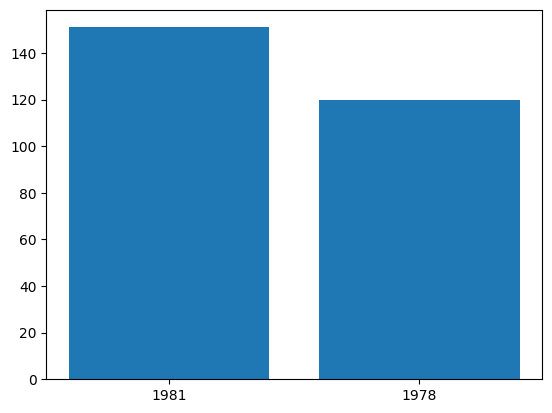

In [ ]:
plt.bar(year.index, year.values)

<Axes: ylabel='None'>

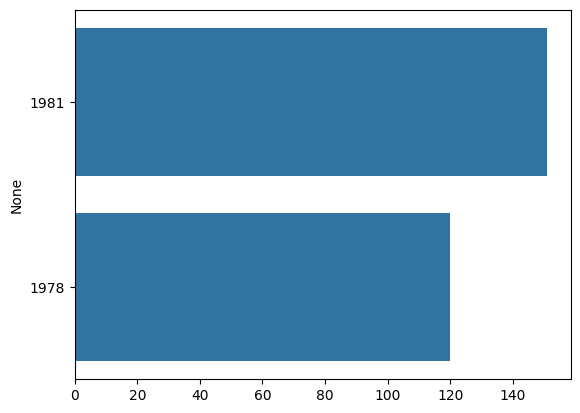

In [ ]:
sns.barplot(x=year.values, y=year.index, orient='h')

<Axes: xlabel='PRICE', ylabel='Count'>

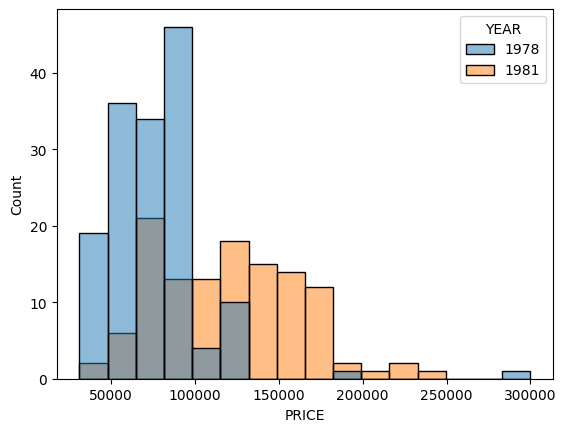

In [ ]:
sns.histplot(wage, x='PRICE', hue='YEAR')

<Axes: ylabel='ROOMS'>

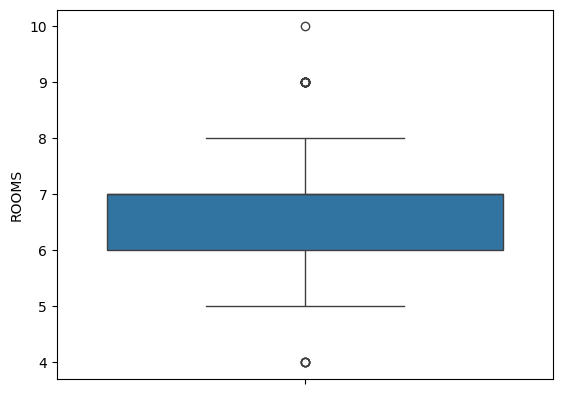

In [37]:
sns.boxplot(data, y='ROOMS')

<Axes: ylabel='BATHS'>

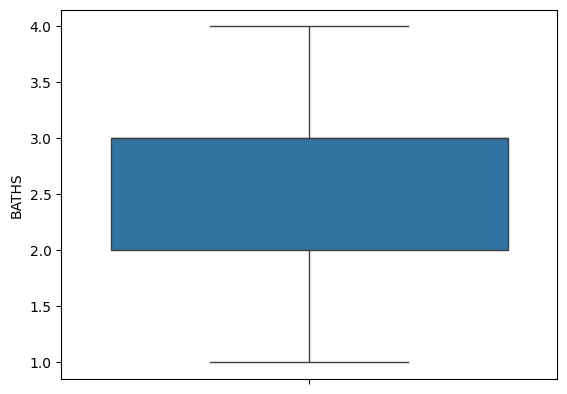

In [38]:
sns.boxplot(data, y='BATHS')

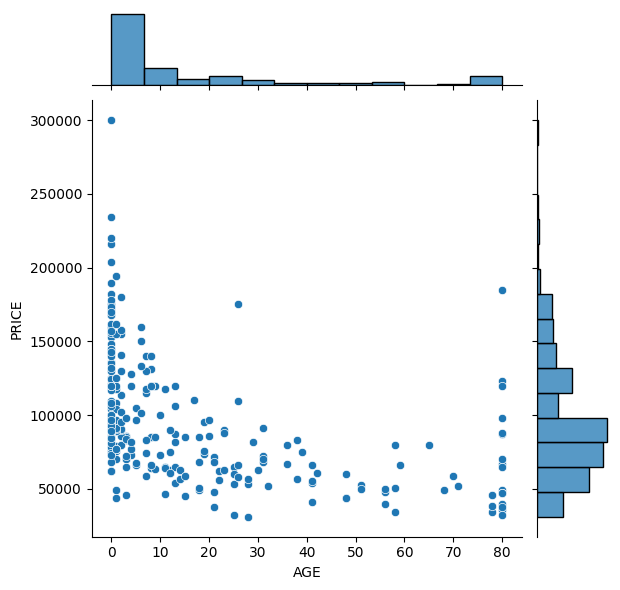

In [40]:
sns.jointplot(y=wage['PRICE'],x=wage['AGE'])

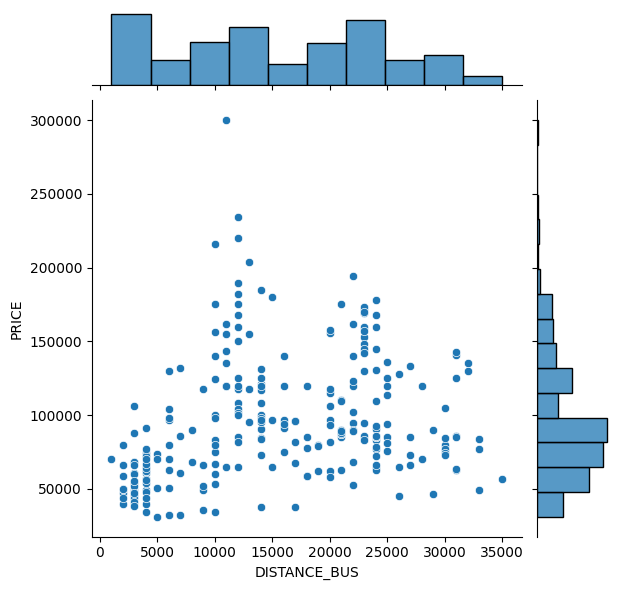

In [41]:
sns.jointplot(y=wage['PRICE'],x=wage['DISTANCE_BUS'])

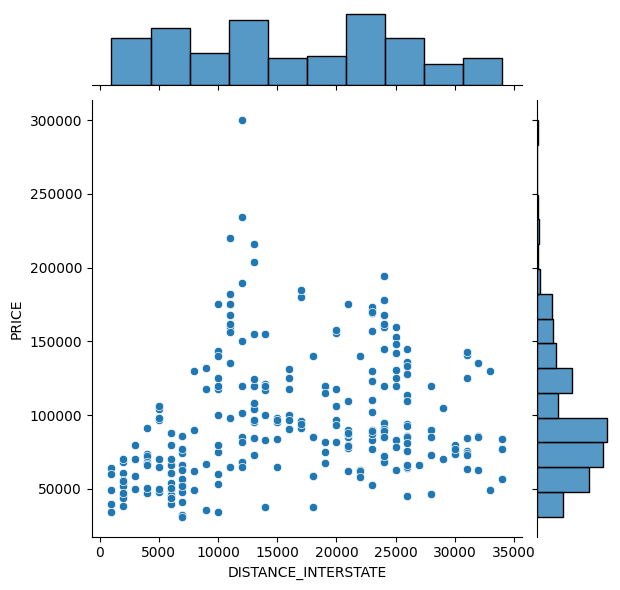

In [42]:
sns.jointplot(y=wage['PRICE'],x=wage['DISTANCE_INTERSTATE'])

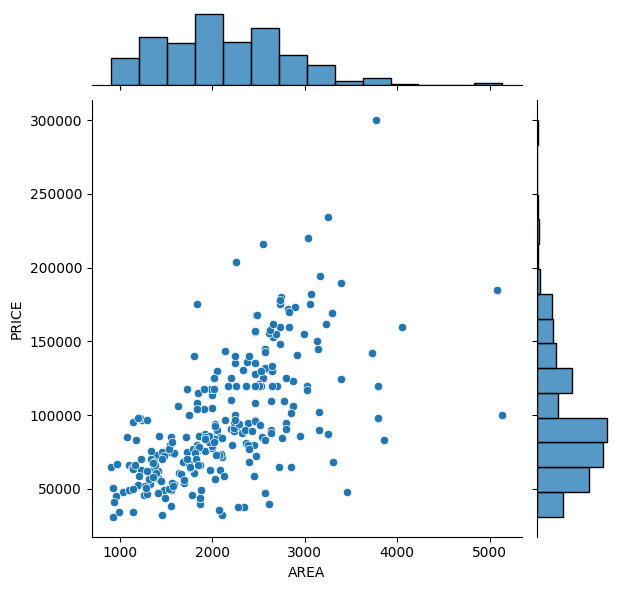

In [43]:
sns.jointplot(y=wage['PRICE'],x=wage['AREA'])

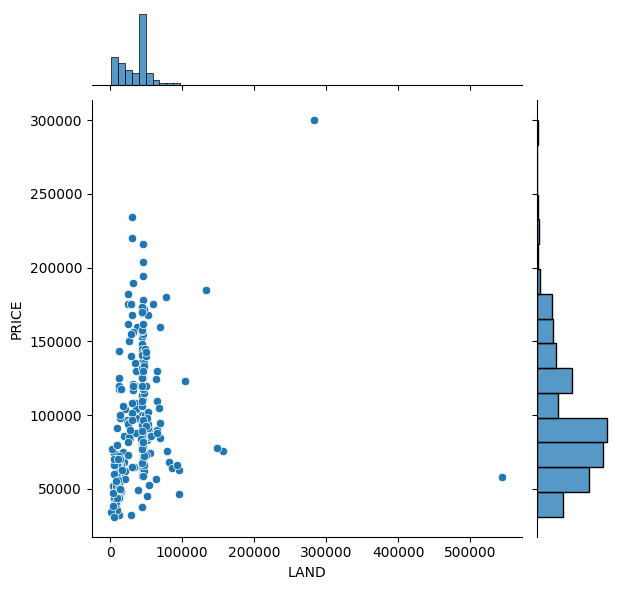

In [44]:
sns.jointplot(y=wage['PRICE'],x=wage['LAND'])

<Axes: xlabel='YEAR', ylabel='PRICE'>

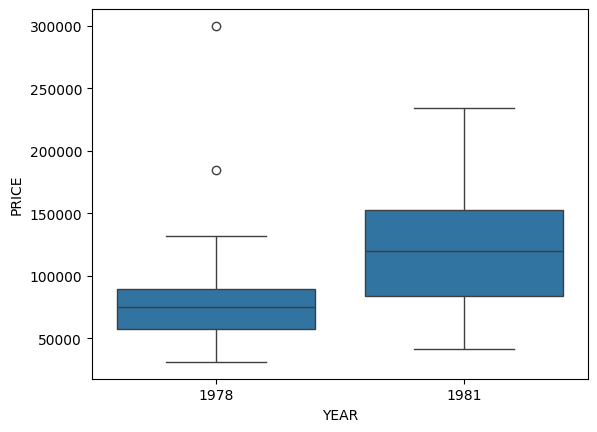

In [45]:
sns.boxplot(wage, y='PRICE', x='YEAR')

<Axes: xlabel='BATHS', ylabel='PRICE'>

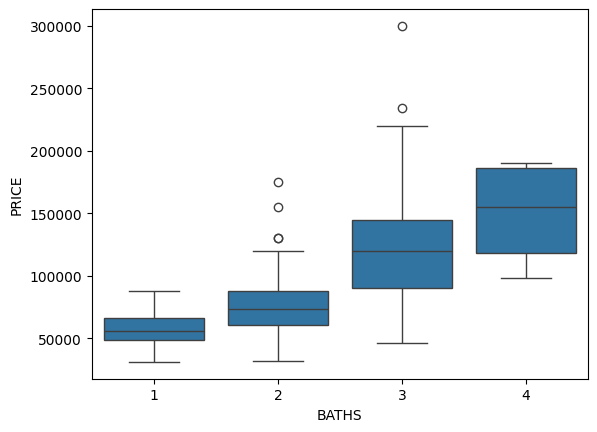

In [46]:
sns.boxplot(wage, y='PRICE', x='BATHS')

<Axes: xlabel='ROOMS', ylabel='PRICE'>

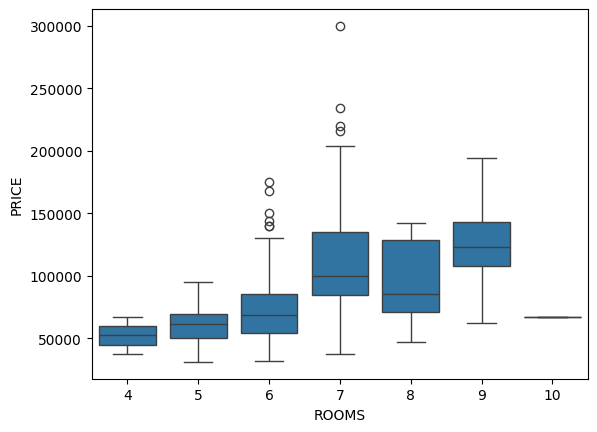

In [47]:
sns.boxplot(wage, y='PRICE', x='ROOMS')